# Assignment overview
The overarching goal of this assignment is to produce a research report in which you implement, analyse, and discuss various Neural Network techniques. You will be guided through the process of producing this report, which will provide you with experience in report writing that will be useful in any research project you might be involved in later in life.

All of your report, including code and Markdown/text, ***must*** be written up in ***this*** notebook. This is not typical for research, but is solely for the purpose of this assignment. Please make sure you change the title of this file so that XXXXXX is replaced by your candidate number. You can use code cells to write code to implement, train, test, and analyse your NNs, as well as to generate figures to plot data and the results of your experiments. You can use Markdown/text cells to describe and discuss the modelling choices you make, the methods you use, and the experiments you conduct. So that we can mark your reports with greater consistency, please ***do not***:

* rearrange the sequence of cells in this notebook.
* delete any cells, including the ones explaining what you need to do.

If you want to add more code cells, for example to help organise the figures you want to show, then please add them directly after the code cells that have already been provided.

Please provide verbose comments throughout your code so that it is easy for us to interpret what you are attempting to achieve with your code. Long comments are useful at the beginning of a block of code. Short comments, e.g. to explain the purpose of a new variable, or one of several steps in some analyses, are useful on every few lines of code, if not on every line. Please do not use the code cells for writing extensive sentences/paragraphs that should instead be in the Markdown/text cells.

# Abstract/Introduction (instructions) - 15 MARKS
Use the next Markdown/text cell to write a short introduction to your report. This should include:
* a brief description of the topic (image classification) and of the dataset being used (CIFAR10 dataset). (2 MARKS)
* a brief description of how the CIFAR10 dataset has aided the development of neural network techniques, with examples. (3 MARKS)
* a descriptive overview of what the goal of your report is, including what you investigated. (5 MARKS)
* a summary of your major findings. (3 MARKS)
* two or more relevant references. (2 MARKS)

Image classification is a classic computer vision problem, with the aim of identifying the contents of images. The CIFAR 10 dataset is a set of 60,000 labelled images with a size of 32x32 pixels; each image has 1 of 10 labels.

The CIFAR10 dataset has aided neural network development by being an easily accessible set of labelled images that allows anyone to use. Since 2010, the error rate of image recognition with the CIFAR10 dataset has dropped from 21.1% to 0.5%, meaning that CIFAR10 has played a large part in developing image recognition techniques.

This report aims to investigate several neural network techniques when applied to image classification, including: varying learning rates, and implementing dropout and transverse learning.
Potential learning rates were chosen around 0.001 (keras’ implementation of 'Adam's default value) to see if any of these values would result in a higher performing network. When applying dropout, keras also implements a default value. Like the optimiser, values surrounding the default were tested to see which would produce the most accurate network. The convolutional layers in the model when investigating transverse learning used weights learnt when testing the base model. The model was then trained using the dropout rate with the best average performance and compared to a model trained without dropout.

It was found that most accurate learning rate was 0.0005 and that, when using scheduled learning, the resulting network was more resistant to overfitting and more consistent between trials. Using dropout reduces the chance of overfitting, but when applied to transfer learning, reduces accuracy. Transfer learning increased accuracy by 30% while reducing loss by 66%.

A dropout rate of 0 gave the worst performance out of all tested values but when using transfer learning, the networks with a dropout rate of 0 performed better.


# Methodology (instructions) - 55 MARKS
Use the next cells in this Methodology section to describe and demonstrate the details of what you did, in practice, for your research. Cite at least two academic papers that support your model choices. The overarching prinicple of writing the Methodology is to ***provide sufficient details for someone to replicate your model and to reproduce your results, without having to resort to your code***. You must include at least these components in the Methodology:
* Data - Decribe the dataset, including how it is divided into training, validation, and test sets. Describe any pre-processing you perform on the data, and explain any advantages or disadvantages to your choice of pre-processing.
* Architecture - Describe the architecture of your model, including all relevant hyperparameters. The architecture must include 3 convolutional layers followed by two fully connected layers. Include a figure with labels to illustrate the architecture.
* Loss function - Describe the loss function(s) you are using, and explain any advantages or disadvantages there are with respect to the classification task.
* Optimiser - Describe the optimiser(s) you are using, including its hyperparameters, and explain any advantages or disadvantages there are to using that optimser.
* Experiments - Describe how you conducted each experiment, including any changes made to the baseline model that has already been described in the other Methodology sections. Explain the methods used for training the model and for assessing its performance on validation/test data.


## Data (7 MARKS)

CIFAR10 is a set of 60,000 32x32 pixel colour images, each with one of 10 labels including modes of transport and animals. The array of 32x32x3 images was preprocessed by batching the images using the "xception" function in the keras "applications" library. This was largely due to simplicity but also increased the accuracy of the model.

The data for experiment 1 was split into 3 sections, two of which to train network and the last for validation. For experiment 2, the data was split in half, half to train the networks and half to validate. This ensures that both halves of the experiment had the same amount of data for training (the second half using the validation set from the first half to train and the training set to validate).

No other preprocessing was done as the model achieved approximately 70% accuracy without. Padding the images could help preserve positional information, possibly increasing accuracy.


No other preprocessing was done as the model achieved approx. 70% accuracy without. If any more was to be added, padding the images would help preserve some of the positional information about the images, possibly increasing the accuracy.

## Architecture (17 MARKS)

The network used consists of three convolutional layers (with biases initialised as zeros) each combined with a max pooling layer, followed by one flattening layer, and two fully connected layers.

All convolutional layers use a 3x3 filter with a stride of 1 and no padding and the ReLU function. The small filter and stride values preserve locational information. No padding was needed as the stride of 1 meant that all image values are considered.

The first max pooling layer uses a 3x3 filter to downsample the data, while the others use a 2x2 filter. No padding is used when pooling. The stride value matched the pool size.

The flattening layer converts the output 64x1x1 3D array into a 64-element long vector for the fully connected layers.

The first fully connected layer takes this vector and applies the "ReLU" activation function. The output 32 element vector is parsed to the final layer, which applies the "softmax" activation function and returns a probability distribution for the 10 different labels. Both fully connected layers' biases initialise as zeros.


![](https://drive.google.com/uc?export=view&id=1cL-yZ5iVMhylxmPInNHiwfWXjjm8mny-)


## Loss function (3 MARKS)

The "sparce categorical cross entropy" loss function is used when computing the cross-entropy loss between labels and predictions. Cross-entropy is used as it tries to minimise the negative log probability of the correct class, meaning that it is well suited for a multi-class classification task.

## Optimiser (4 MARKS)

Adam is "computationally efficient, [and] has little memory requirement" (Diederik P., et. al.). The stochastic gradient descent used provides fast convergence speeds, reducing the number of epochs, so more data can be gathered over the same interval.

The default learning rate for the keras implementation of Adam is 0.001, meaning that, where unspecified, a learning rate of 0.001 is used.





## Experiments
### Experiment 1 (8 MARKS)

Potential learning rate were chosen around 0.001 (keras’ implementation of 'Adam's default value) [0.0005, 0.001, 0.0015, 0.002, 0.0025]. There is a high likelihood that these values would not lead the network to become unstable. All other hyperparameters were kept as default.

Learning rates and results arrays were created, and the number of epochs and trials were declared (20 and 5 respectively). For each trial, a new model was created preventing any previous training skewing results. The validation accuracy over each trial was recorded and the average validation loss and accuracy plotted.

When implementing scheduled learning, the learning rate with the steepest initial loss gradient was chosen as the initial learning rate. The learning rate was changed twice to the rate found to have the lowest average loss to reduce overfitting.



### Experiment 2 (8 MARKS)

Transfer learning uses the weights from a different task to initialise the new network weights to determine how dropout affects the performance of a network using transfer learning.

The training data was split in half for training and validation, one half investigate how dropout rate affects performance and half to conduct transfer learning.

5 different dropout rates (centred around the default value of 0.1) were tested over 5 trials. The average accuracy and loss were calculated for each dropout rate and plotted.

During transfer learning, the training and validation data were swapped. The weights used in the transfer learning task were a copy of the final weights of the base model. After the weights were applied, the convolutional layers’ weights were frozen. As a network was created for each trial, the fully connected layer weights did not need to be reinitialised.

Finally, one network was trained with a dropout rate of 0 and another using the non-zero rate with the highest average performance.


### Experiment 3 (8 MARKS)

In [2]:
############################################
### Code for building the baseline model ###
############################################

%matplotlib inline

!pip install tensorflow
!pip install keras
!pip install torchvision
!pip install numpy

import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import numpy as np
from numpy.random import randn
import tensorflow as tf
import keras
import random
from keras.optimizers import Adam
from keras.optimizers import SGD
from tensorflow.keras import datasets, layers, models

#CIFAR10 - https://www.cs.toronto.edu/~kriz/cifar.html

In [129]:
#Split the data
(raw_train_images, train_labels), (raw_test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = np.zeros(raw_train_images.shape), np.zeros(raw_test_images.shape)

for x in range(raw_train_images.shape[0]):
    train_images[x] = keras.applications.xception.preprocess_input(raw_train_images[x])
for x in range(raw_test_images.shape[0]):
    test_images[x] = keras.applications.xception.preprocess_input(raw_test_images[x])

train_images_array = np.array_split(train_images, 3)
train_label_array = np.array_split(train_labels, 3)
train_images, validation_images, test_images = np.concatenate((train_images_array[0], train_images_array[1]), axis=0), train_images_array[2], test_images
train_labels, validation_labels, test_labels = np.concatenate((train_label_array[0], train_label_array[1]), axis=0), train_label_array[2], test_labels

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [4]:
keras.backend.clear_session()
#Make the model
model = models.Sequential()
# 3 Convolutional layers with 2 max pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dense(256, activation='relu'))
model.add(layers.Flatten())
# 2 fully connected layers
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

C:\Users\micha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,730 (229.41 KB)

 Trainable params: 58,730 (229.41 KB)

 Non-trainable params: 0 (0.00 B)

In [216]:
layer1 = layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))
layer2 = layers.Conv2D(64, (3, 3), activation='relu')
layer3 = layers.Conv2D(64, (3, 3), activation='relu')

keras.backend.clear_session()
#Make the model
model = models.Sequential()
# 3 Convolutional layers with 2 max pooling layers
model.add(layer1)
#model.add(layers.MaxPooling2D((3, 3)))
model.add(layer2)
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layer3)
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dense(256, activation='relu'))
model.add(layers.Flatten())
# 2 fully connected layers
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
#opt = Adam(learning_rate = 0.001)
epochs_number = 20
model.compile(optimizer=Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(x=train_images, y=train_labels, validation_data=(validation_images, validation_labels), epochs=epochs_number)
model.evaluate(test_images, test_labels)

default_conv_layers = [layer1.get_weights(), layer2.get_weights(), layer3.get_weights()]

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 26, 26, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         346,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 402,794 (1.54 MB)

 Trainable params: 402,794 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


C:\Users\micha\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1042/1042 ━━━━━━━━━━━━━━━━━━━━ 23s 20ms/step - accuracy: 0.4087 - loss: 1.6407 - val_accuracy: 0.6143 - val_loss: 1.0978
Epoch 2/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.6580 - loss: 0.9788 - val_accuracy: 0.6530 - val_loss: 0.9838
Epoch 3/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.7270 - loss: 0.7832 - val_accuracy: 0.6844 - val_loss: 0.9254
Epoch 4/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.7810 - loss: 0.6294 - val_accuracy: 0.6741 - val_loss: 0.9838
Epoch 5/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.8276 - loss: 0.4969 - val_accuracy: 0.6836 - val_loss: 0.9896
Epoch 6/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.8675 - loss: 0.3806 - val_accuracy: 0.6790 - val_loss: 1.1115
Epoch 7/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9014 - loss: 0.2823 - val_accuracy: 0.6612 - val_loss: 1.3127
Epoch 8/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.9264 - loss: 0.21

In [21]:
keras.backend.clear_session()
#Make the model
model = models.Sequential()
# 3 Convolutional layers with 2 max pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dense(256, activation='relu'))
model.add(layers.Flatten())
# 2 fully connected layers
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()
#Make the model
#opt2 = SGD()
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

history2 = model.fit(x=train_images, y=train_labels, validation_data=(validation_images, validation_labels), epochs=epochs_number)
sgd_results = model.evaluate(test_images, test_labels)


C:\Users\micha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,730 (229.41 KB)

 Trainable params: 58,730 (229.41 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


C:\Users\micha\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1042/1042 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 67.0718 - val_loss: 2.3026
Epoch 2/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.3027 - val_loss: 2.3028
Epoch 3/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.3028 - val_loss: 2.3029
Epoch 4/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.3026 - val_loss: 2.3027
Epoch 5/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.3027 - val_loss: 2.3027
Epoch 6/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.3028 - val_loss: 2.3027
Epoch 7/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.3027 - val_loss: 2.3027
Epoch 8/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.3027 - val_loss: 2.3027
Epoch 9/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.3027 - val_loss: 2.3026
Epoch 10/10
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 2.3027 - val_loss: 2.3027
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3026


2.302605390548706
1.2045522928237915


<function matplotlib.pyplot.show(close=None, block=None)>

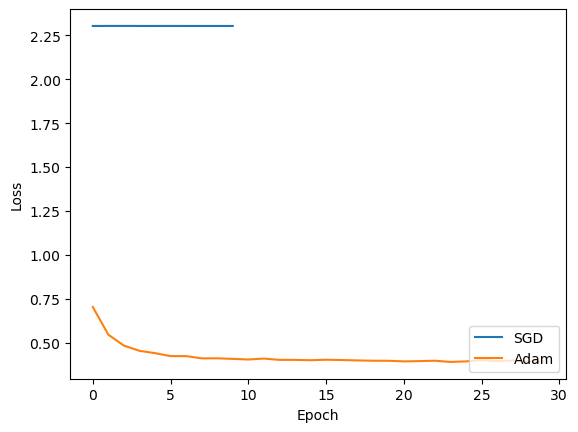

In [203]:
print(sgd_results)
print(adam_results)


plt.plot(history2.history['val_loss'], label="SGD")
plt.plot(history.history['val_loss'], label="Adam")
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([00, 1])
plt.legend(loc='lower right')
plt.show

# Results (instructions) - 55 MARKS
Use the Results section to summarise your findings from the experiments. For each experiment, use the Markdown/text cell to describe and explain your results, and use the code cell (and additional code cells if necessary) to conduct the experiment and produce figures to show your results.


### Experiment 1 (17 MARKS)


![](https://drive.google.com/uc?export=view&id=1AM2x1B8D4t7fadaqkTL4ff3JcOoLS0NP)

Figure 2

Figure 2 shows the initial gradient for all learning rates except 0.0005 to be similar, with the accuracy for the 0.0005 rate only approaching the others after 8 epochs. When the accuracy reached that of the 0.001 learning rate (68.9% (3 s.f.)), all other networks have started to overfit, reducing the accuracy. A low learning rate makes a network more resistant to overfitting; the 0.0005 rate ends with the highest accuracy of 69.1% (3 s.f.).

The average accuracy for the 0.0025 and 0.002 learning rates are similar throughout all 20 epochs, both plateau after 7, and start to lose accuracy after 10.

The 0.0015 learning rate plot has the fastest initial convergence increasing in accuracy until epoch 8. The accuracy then decreases until it has the second lowest accuracy with 68.4% (3 s.f.).

The default value (0.001) had the highest accuracy after 4 epochs with 67.1% (3 s.f.), reaching the global maximum of 69.9% (3 s.f.) after only 8 epochs. From epoch 10 onwards, the accuracy plateaued until epoch 16 where if dropped from 69.5% (3 s.f.) to 68.8% (3 s.f.).

The learning rate of 0.0005 ended with the highest average accuracy and was least affected by overfitting.


![](https://drive.google.com/uc?export=view&id=1bunMxGnNqJvU310_6ewwInZy-mHKq5TT)

Figure 3


Average loss (figure 3) started to increase after a similar epoch to when accuracy decreases. The loss of the 0.0005 rate reaches its minimum after 12 epochs, ending with the lowest loss of 0.0106 (3 s.f.).

The 0.001 and 0.002 curves had the second highest loss with 0.0120 (3 s.f.) with the 0.002 networks overfitting after 6 epochs and the 0.001 networks overfitting after 8. The 0.0015 curve shows that most overfitting with a loss of 0.00932 after 8 epochs and a loss of 0.0124 (3 s.f.) after 20 epochs.



![](https://drive.google.com/uc?export=view&id=1dHuidmAhnDl5aO9R3oFrLvbgl3u9qEEP)

Figure 4


The average accuracy (figure 4) for networks using the scheduler was higher than those without. Between epochs 9 and 14 the scheduler accuracy curve plateaus at 69.5% (3 s.f.), after which, the smallest learning rate is used, and the accuracy reaches 70.4% (3 s.f.). The scheduler started to overfit after 15 epochs, but as the lowest learning rate was in effect, the accuracy ended at 69.9% (3 s.f.).

The accuracy curve for the non-scheduled learning rate was lower than the scheduled curve until it's maximum value of 69.9% (3 s.f.) was reached. After this, the model started to overfit, ending with an accuracy of 68.6% (3 s.f.).



![](https://drive.google.com/uc?export=view&id=1I7oqPy2UQW0usutKMYBZcYhPnpTbIZso)

Figure 5


Figure 5 shows that scheduled loss was below non-scheduled loss until epoch 8, reaching a minimum loss of 0.936 (3 s.f.). After 8 epochs, the scheduled networks had a higher loss than the non-scheduled networks with 1.25 (3 s.f.) and 1.20 (3 s.f.) respectively. The scheduled curve is smoother, suggesting more consistent loss across trials.




In [226]:
#############################
### Code for Experiment 1 ###
#############################
learning_rates = np.array([0.0005, 0.001, 0.0015, 0.002, 0.0025]) #Declaration of the different learning rates being tested
#opt_array = np.array([Adam(learning_rate=learning_rates[0]), Adam(learning_rate=learning_rates[1]), Adam(learning_rate=learning_rates[2]), Adam(learning_rate=learning_rates[3]), Adam(learning_rate=learning_rates[4])]) #Declaration of optimizers using the 5 learning rates specified
epochs_number, trial_number = 20, 5 #Declaration of the number of epochs and trials each learning rate will be trained over
val_trial_loss_results, val_average_loss_results = np.zeros((trial_number, epochs_number)), np.zeros((learning_rates.shape[0], epochs_number)) #Declaration of arrays to hold the validation accuracy for each trial (same learning rate) and accross different learning rates
val_trial_acc_results, val_average_acc_results = np.zeros((trial_number, epochs_number)), np.zeros((learning_rates.shape[0], epochs_number)) #Declaration of arrays to hold the validation accuracy for each trial (same learning rate) and accross different learning rates
#error_trail_results, error_average_results = np.zeros((trial_number, epochs_number)), np.zeros((opt_array.shape[0], epochs_number)) #Declaration of arrays to hold the validation accuracy for each trial (same learning rate) and accross different learning rates

for learning_rate in range(learning_rates.shape[0]): #For loop to ensure that all specified oprimizers are tested
    print("\nLearning rate: ", learning_rates[learning_rate]) #Declaration of which learning rate is currently being used
    for trial in range(trial_number): #For loop to ensure that "trial_number" trials are completed for each optimizer
        print("Trial number: ", trial) #Declaration of the trial number -> used to check progress
        keras.backend.clear_session() #Any stored data for the NN is deleted, ensuring all biases and weights are reset
        #Make the model - Reinitializing the model each time ensures that weight and biases are not affected by previous trials
        model = models.Sequential()
        # 3 Convolutional layers with 2 max pooling layers
        model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
        model.add(layers.MaxPooling2D((3, 3)))
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        #model.add(layers.Dense(256, activation='relu'))
        model.add(layers.Flatten())
        # 2 fully connected layers
        model.add(layers.Dense(32, activation='relu'))
        model.add(layers.Dense(10, activation='softmax'))
        #model.summary()
        model.compile(optimizer=Adam(learning_rate=learning_rates[learning_rate]), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"]) #A model is compiled using the structure above with the given optimizer
        history = model.fit(x=train_images, y=train_labels, validation_data=(validation_images, validation_labels), epochs=epochs_number) #The model is run for "epochs_number" epochs and saved to "history"
        val_trial_loss_results[trial] = history.history['val_loss'] #The validation accuracy of the model is saved in the "trial_results" array
        val_trial_acc_results[trial] = history.history['val_accuracy'] #The validation accuracy of the model is saved in the "trial_results" array

    for epoch in range(epochs_number):
        val_average_loss_results[learning_rate, epoch] = (np.sum(val_trial_loss_results[:, epoch])/trial_number) #For every epoch across trials, the average validation accuracy after that epoch is recorded in "average_results"
        val_average_acc_results[learning_rate, epoch] = 100*(np.sum(val_trial_acc_results[:, epoch])/trial_number) #For every epoch across trials, the average validation accuracy after that epoch is recorded in "average_results"

    #plt.plot(val_average_loss_results[learning_rate], label = learning_rates[learning_rate])


#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


Learning rate:  0.0005
Trial number:  0


C:\Users\micha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


C:\Users\micha\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1042/1042 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3128 - loss: 1.8844 - val_accuracy: 0.4684 - val_loss: 1.4552
Epoch 2/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5104 - loss: 1.3678 - val_accuracy: 0.5426 - val_loss: 1.2813
Epoch 3/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5710 - loss: 1.2039 - val_accuracy: 0.5527 - val_loss: 1.2385
Epoch 4/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6128 - loss: 1.1040 - val_accuracy: 0.6039 - val_loss: 1.1197
Epoch 5/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6413 - loss: 1.0165 - val_accuracy: 0.6236 - val_loss: 1.0789
Epoch 6/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6618 - loss: 0.9605 - val_accuracy: 0.6500 - val_loss: 1.0187
Epoch 7/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6886 - loss: 0.8876 - val_accuracy: 0.6501 - val_loss: 1.0001
Epoch 8/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7049 - loss: 0.8477 - val_accurac

In [ ]:
# Ammends for the loss being multiplied by 100. This is done with accuracy to get the percentange value but was not removed from the loss before running the networks
val_loss_correct = np.zeros([val_average_loss_results.shape[0], val_average_loss_results.shape[1]])
for x in range(opt_array.shape[0]):
    for y in range(val_average_loss_results.shape[1]):
        val_loss_correct[x, y] = val_average_loss_results[x, y]/100
    plt.plot(val_loss_correct[x], label = learning_rates[x]) # Plots loss during validation for each learning rate

print(val_loss_correct)
plt.title('Average validation loss for different learning rates')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.0, 100])
plt.legend(loc='lower right')
plt.show


In [ ]:
for x in range(opt_array.shape[0]):
    plt.plot(val_average_acc_results[x], label = learning_rates[x])

plt.title('Average validation accuracy for different learning rates')
plt.xlabel('Epoch')
plt.ylabel('Acuracy')
plt.ylim([0.0, 100])
plt.legend(loc='lower right')
plt.show

In [ ]:
print(val_average_acc_results)
for x in range(opt_array.shape[0]):
    plt.plot(val_average_acc_results[x], label = learning_rates[x])

plt.title('Average validation accuracy for different learning rates')
plt.xlabel('Epoch')
plt.ylabel('Acuracy')
plt.legend(loc='lower right')
plt.show

In [ ]:
print(val_average_acc_results)
print(val_average_loss_results)

In [227]:
learning_rates = np.array([0.0005, 0.001, 0.0015, 0.002, 0.0025]) #Declaration of the different learning rates being tested
epochs_number, trial_number = 20, 5 #Declaration of the number of epochs and trials each learning rate will be trained over
schedule_trial_results, schedule_average_results = np.zeros((trial_number, epochs_number)), np.zeros((2, epochs_number)) #Declaration of arrays to hold the validation accuracy for each trial (same learning rate) and accross different learning rate
schedule_trial_loss_results, schedule_average_loss_results = np.zeros((trial_number, epochs_number)), np.zeros((2, epochs_number)) #Declaration of arrays to hold the validation accuracy for each trial (same learning rate) and accross different learning rate
#s_test_accuracy, s_test_loss, = np.zeros((trial_number, epochs_number)), np.zeros((trial_number, epochs_number))
#ns_test_accuracy, ns_test_loss = np.zeros((trial_number, epochs_number)), np.zeros((trial_number, epochs_number))
#test_ave_acc, test_ave_loss = np.zeros((2, epochs_number)), np.zeros((2, epochs_number))

def scheduler(epoch, lr):
    if epoch < 4:
        return learning_rates[2]
    elif epoch > 4 - 1 and epoch < 14:
        return learning_rates[1]
    elif epoch > 14 - 1:
        return learning_rates[0]

print("\nScheduler") #Declaration that the scheduler is being tested
for trial in range(trial_number): #For loop to ensure that "trial_number" trials are completed for each optimizer
    print("Trial number: ", trial) #Declaration of the trial number -> used to check progress
    keras.backend.clear_session() #Any stored data for the NN is deleted, ensuring all biases and weights are reset
    #Make the model - Reinitializing the model each time ensures that weight and biases are not affected by previous trials
    model = models.Sequential()
    # 3 Convolutional layers with 2 max pooling layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((3, 3)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    #model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Flatten())
    # 2 fully connected layers
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    #model.summary()
    model.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']) #A model is compiled using the structure above with the given optimizer
    callback = keras.callbacks.LearningRateScheduler(scheduler) #Assigns the scheduler function (above) to a scheduler
    history = model.fit(x=train_images, y=train_labels, validation_data=(test_images, test_labels), epochs=epochs_number, callbacks=[callback]) #The model is run for "epochs_number" epochs and saved to "history"
    schedule_trial_results[trial] = history.history['val_accuracy'] #The validation accuracy of the model is saved in the "trial_results" array
    schedule_trial_loss_results[trial] = history.history['val_loss'] #The validation accuracy of the model is saved in the "trial_results" array
    #s_test_loss[trial], s_test_accuracy[trial] = model.evaluate(test_images,  test_labels, verbose=5)


for epoch in range(epochs_number):
    schedule_average_results[0, epoch] = 100*(np.sum(schedule_trial_results[:, epoch])/trial_number) #For every epoch across trials, the average validation accuracy after that epoch is recorded in "average_results"
    schedule_average_loss_results[0, epoch] = (np.sum(schedule_trial_loss_results[:, epoch])/trial_number) #For every epoch across trials, the average validation accuracy after that epoch is recorded in "average_results"
    #test_ave_acc[0, epoch] = np.sum(s_test_accuracy[:, epoch])/trial_number
    #test_ave_loss[0, epoch] = np.sum(s_test_loss[:, epoch])/trial_number

#plt.plot(average_results[0], label = "Scheduler")
#test_loss_sheduler, test_acc_sheduler = model.evaluate(test_images,  test_labels, verbose=5)


print("\nNo scheduler") #Declaration that the scheduler is being tested
for trial in range(trial_number): #For loop to ensure that "trial_number" trials are completed for each optimizer
    print("Trial number: ", trial) #Declaration of the trial number -> used to check progress
    keras.backend.clear_session() #Any stored data for the NN is deleted, ensuring all biases and weights are reset
    #Make the model - Reinitializing the model each time ensures that weight and biases are not affected by previous trials
    model = models.Sequential()
    # 3 Convolutional layers with 2 max pooling layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((3, 3)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    #model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Flatten())
    # 2 fully connected layers
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    #model.summary()
    model.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']) #A model is compiled using the structure above with the given optimizer
    history = model.fit(x=train_images, y=train_labels, validation_data=(test_images, test_labels), epochs=epochs_number) #The model is run for "epochs_number" epochs and saved to "history"
    schedule_trial_results[trial] = history.history['val_accuracy'] #The validation accuracy of the model is saved in the "trial_results" array
    schedule_trial_loss_results[trial] = history.history['val_loss'] #The validation accuracy of the model is saved in the "trial_results" array
    #ns_test_loss[trial], ns_test_accuracy[trial] = model.evaluate(test_images,  test_labels, verbose=5)

print(schedule_trial_results)
print(schedule_average_loss_results.shape)


for epoch in range(epochs_number):
    schedule_average_results[1, epoch] = 100*(np.sum(schedule_trial_results[:, epoch])/trial_number) #For every epoch across trials, the average validation accuracy after that epoch is recorded in "average_results"
    schedule_average_loss_results[1, epoch] = (np.sum(schedule_trial_loss_results[:, epoch])/trial_number) #For every epoch across trials, the average validation accuracy after that epoch is recorded in "average_results"
    #test_ave_acc[1, epoch] = np.sum(ns_test_accuracy[:, epoch])/trial_number
    #test_ave_loss[1, epoch] = np.sum(ns_test_loss[:, epoch])/trial_number


#test_loss_no_sheduler, test_acc_no_sheduler = model.evaluate(test_images,  test_labels, verbose=5)





#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


Scheduler
Trial number:  0
Epoch 1/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.3420 - loss: 1.7674 - val_accuracy: 0.5336 - val_loss: 1.2861 - learning_rate: 0.0015
Epoch 2/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5672 - loss: 1.2033 - val_accuracy: 0.6039 - val_loss: 1.1490 - learning_rate: 0.0015
Epoch 3/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6383 - loss: 1.0198 - val_accuracy: 0.6527 - val_loss: 1.0080 - learning_rate: 0.0015
Epoch 4/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6785 - loss: 0.9011 - val_accuracy: 0.6710 - val_loss: 0.9452 - learning_rate: 0.0015
Epoch 5/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7287 - loss: 0.7724 - val_accuracy: 0.6882 - val_loss: 0.8949 - learning_rate: 0.0010
Epoch 6/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7533 - loss: 0.7035 - val_accuracy: 0.6899 - val_loss: 0.9140 - learning_rate: 0.0010
Epoch 7/20
1042/1042 ━━━━━━━━━━━━━━━━━━━━ 6s 6m

In [ ]:
print(schedule_average_loss_results)

<function matplotlib.pyplot.show(close=None, block=None)>

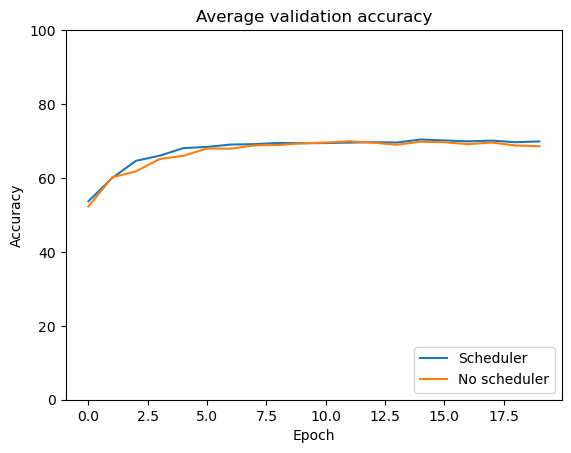

In [228]:
plt.title("Average validation accuracy")
plt.plot(schedule_average_results[0], label = "Scheduler")
plt.plot(schedule_average_results[1], label = "No scheduler")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 100])
plt.legend(loc='lower right')
plt.show

[[53.70599985 59.99400139 64.63799953 66.02600098 68.07599902 68.40600014
  69.04599905 69.14199948 69.47000027 69.40400004 69.44399953 69.57399964
  69.68199968 69.59199905 70.41200042 70.14999986 69.90000129 70.11000037
  69.66800094 69.88999963]
 [52.30399966 60.15799999 61.79999948 65.13200045 66.00200057 67.9820013
  67.91400075 68.81399989 68.92400146 69.36000109 69.58000064 69.9240005
  69.54799891 68.97999883 69.82600093 69.65399981 69.14399981 69.5840013
  68.78399968 68.5740006 ]]


<function matplotlib.pyplot.show(close=None, block=None)>

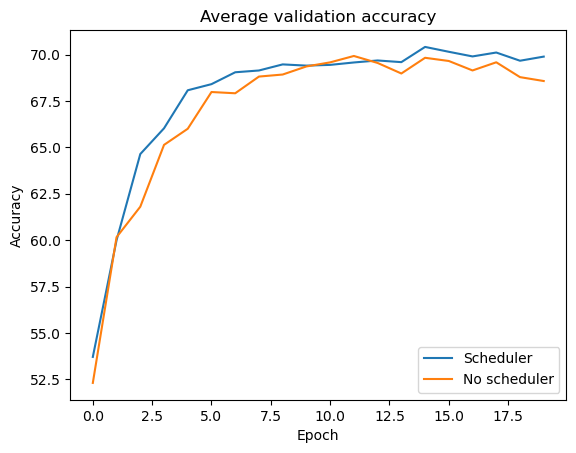

In [232]:
print(schedule_average_results)

plt.title("Average validation accuracy")
plt.plot(schedule_average_results[0], label = "Scheduler")
plt.plot(schedule_average_results[1], label = "No scheduler")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show

[[1.28238578 1.13834057 1.00999593 0.97652395 0.9246097  0.91856594
  0.9183051  0.91931317 0.92896053 0.9501335  0.95723161 0.97169141
  0.98906257 1.01451955 1.03223004 1.09087276 1.11204879 1.14344873
  1.19880793 1.2498404 ]
 [1.33012326 1.13031032 1.07542403 0.99715912 0.98268397 0.92985626
  0.94215575 0.92216034 0.93561724 0.93780105 0.95533603 0.93990406
  0.97674881 1.02101719 0.98907301 1.05206714 1.07730207 1.07432573
  1.14665322 1.19703658]]


<function matplotlib.pyplot.show(close=None, block=None)>

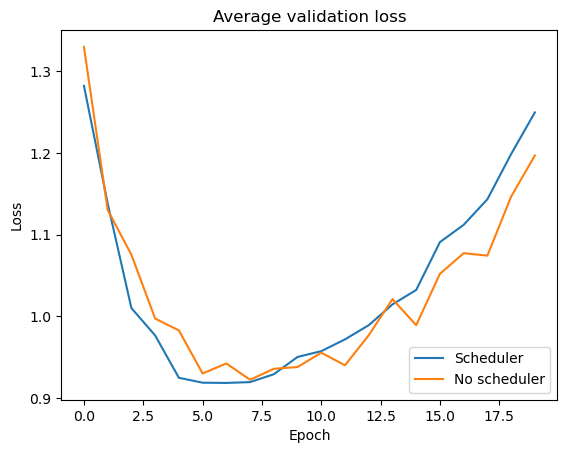

In [233]:
print(schedule_average_loss_results)

plt.plot(schedule_average_loss_results[0], label = "Scheduler")
plt.plot(schedule_average_loss_results[1], label = "No scheduler")
plt.title("Average validation loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0, 100])
plt.legend(loc='lower right')
plt.show

### Experiment 2 (19 MARKS)



![](https://drive.google.com/uc?export=view&id=1LuZ44cB9T2ILbTuVLCRMjAPAMz3k93nH)

Figure 6

Figure 6 shows that average validation accuracy for the dropout rates used ended at approximately 65% after 20 epochs, with the highest (dropout rate of 0.2) having an average accuracy with 66.3% (3 s.f.), and the lowest (dropout rate of 0) having the lowest accuracy with 64.5% (3 s.f.).

The dropout rate of 0.1 had the fastest convergence rate but ended only 4th most accurate with 65.6% (3 s.f.). The 0.2 dropout rate had the slowest convergence rate, taking 18 epochs before it had the highest accuracy.

When comparing the 0 and 0.2 dropout rates, the 0 dropout rate networks peaked faster (65.2% (3 s.f.)) than with 0.2 dropout. After 10 epochs, however, the average accuracy for the 0.2 dropout rate keeps increasing, whereas the 0 dropout rate average decreases. This is because the 0.2 dropout networks overfit less than the 0 dropout networks.


![](https://drive.google.com/uc?export=view&id=1J1TZgnRdRj2Jfp4qd3yBYfe8EhPLzA0e)

Figure 7

Figure 7 shows the average validation loss for the different dropout rates tested. All dropout rates performed similarly until 5 epochs (with a range of average loss from 1.11 (3 s.f.) to 1.16 (3 s.f.)), afterwards, the average loss diverges as different dropout rates cause the networks to overfit differently.

From the 9th epoch, the average loss for networks using 0 and 0.05 dropout rates increased, with the 0 dropout networks having an average loss of 1.48 (3 s.f.) after 20 epochs.

The networks with a dropout rate of 0.15 had the lowest loss with 0.994 (3 s.f.) but ended with a loss of 1.12 (3 s.f.), the second lowest.

0.2 was the best dropout rate over 20 epochs as the accuracy of the models ended the highest, and the loss the lowest. The high dropout rate means that the model didn't overfit much to the training data. The fact that the loss started to increase means that overfitting is happening, but because a high dropout rate means that there is a high chance for nodes to be ignored, the reduced learning rate this creates also means that it is slower to overfit any models with a high dropout rate.

Similar to experiment 1, loss was lowest at approximately 10 epochs.






![](https://drive.google.com/uc?export=view&id=1ZtLkp6GHWIbyK9GHhE8epzIAflDsWhMl)

Figure 8

Figure 8 shows the average validation accuracy (for models with dropout rates of 0.2 and 0) when transfer learning. The networks without dropout had higher average accuracy after every epoch and ended with the highest average accuracy of 86.8% (3 s.f.), whereas for the 0.2 dropout, the highest was 86.3% (3 s.f.), ending on 86.1% (3 s.f.), making it 30% more accurate than without transfer learning.

The curve accuracy when not using dropout is less smooth, implying that some networks were inconsistent with the others, or that the accuracy was inconsistent throughout each network.

The gradient of the accuracy curve for the 0.2 dropout networks decreased earlier than the 0 dropout curve but plateaued later (at epoch 9 rather than 5). The curve is much smoother, implying that the accuracy was more consistent across the different trials.


![](https://drive.google.com/uc?export=view&id=1yTSoTc1CX2xiKvL8BfgDGBCxeP0zjmQd)

Figure 9

Figure 9 shows the 0 dropout loss decreases to 0.384 (3 s.f.) after 6 epochs and plateaus, ending on 0.379 (3 s.f.). This happened 40% faster than without transfer learning while reducing loss by 66%.








In [162]:
#############################
### Code for Experiment 2 ###
#############################

train_images_array = np.array_split(train_images, 2)
train_labels_array = np.array_split(train_labels, 2)
train_images_1, train_images_2 = train_images_array[0], train_images_array[1]
train_labels_1, train_labels_2 = train_labels_array[0], train_labels_array[1]

dropout_rate_array = np.array([0, 0.05, 0.1, 0.15, 0.2]) #Declaration of the dropout rates being tested
epochs_number, trial_number = 20, 5 #Declaration of the number of epochs and trials each learning rate will be trained over
dropout_trial_results, dropout_average_results = np.zeros((trial_number, epochs_number)), np.zeros((dropout_rate_array.shape[0], epochs_number)) #Declaration of arrays to hold the validation accuracy for each trial (same learning rate) and accross different learning rates
dropout_trial_loss_results, dropout_average_loss_results = np.zeros((trial_number, epochs_number)), np.zeros((dropout_rate_array.shape[0], epochs_number)) #Declaration of arrays to hold the validation accuracy for each trial (same learning rate) and accross different learning rates

for dropout_rate in range(dropout_rate_array.shape[0]): #For loop to ensure that all specified dropout rates are tested
    print("\nDropout rate: ", dropout_rate_array[dropout_rate]) #Declaration of which learning rate is currently being used
    for trial in range(trial_number): #For loop to ensure that "trial_number" trials are completed for each optimizer
        print("Trial number: ", trial) #Declaration of the trial number -> used to check progress
        keras.backend.clear_session() #Any stored data for the NN is deleted, ensuring all biases and weights are reset
        #Make the model with dropout
        model = models.Sequential()
        # 3 Convolutional layers with 2 max pooling layers
        model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
        model.add(layers.MaxPooling2D((3, 3)))
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        #model.add(layers.Dense(256, activation='relu'))
        model.add(layers.Flatten())
        # 2 fully connected layers
        model.add(layers.Dropout(dropout_rate_array[dropout_rate]))
        model.add(layers.Dense(32, activation='relu'))
        model.add(layers.Dense(10, activation='softmax'))
        #model.summary()
        model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']) #A model is compiled using the structure above with the given optimizer
        history = model.fit(x=train_images_1, y=train_labels_1, validation_data=(train_images_2, train_labels_2), epochs=epochs_number) #The model is run for "epochs_number" epochs and saved to "history"
        dropout_trial_results[trial] = history.history['val_accuracy'] #The validation accuracy of the model is saved in the "trial_results" array
        dropout_trial_loss_results[trial] = history.history['val_loss'] #The validation accuracy of the model is saved in the "trial_results" array

    for epoch in range(epochs_number):
        dropout_average_results[dropout_rate, epoch] = 100*(np.sum(dropout_trial_results[:, epoch])/trial_number) #For every epoch across trials, the average validation accuracy after that epoch is recorded in "average_results"
        dropout_average_loss_results[dropout_rate, epoch] = (np.sum(dropout_trial_loss_results[:, epoch])/trial_number) #For every epoch across trials, the average validation accuracy after that epoch is recorded in "average_results"




Dropout rate:  0.0
Trial number:  0
Epoch 1/20
521/521 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2821 - loss: 1.9328 - val_accuracy: 0.4501 - val_loss: 1.4838
Epoch 2/20
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4757 - loss: 1.4392 - val_accuracy: 0.5354 - val_loss: 1.3105
Epoch 3/20
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5600 - loss: 1.2431 - val_accuracy: 0.5645 - val_loss: 1.1897
Epoch 4/20
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6117 - loss: 1.0976 - val_accuracy: 0.5877 - val_loss: 1.1759
Epoch 5/20
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6558 - loss: 0.9936 - val_accuracy: 0.6125 - val_loss: 1.1055
Epoch 6/20
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6845 - loss: 0.9074 - val_accuracy: 0.6224 - val_loss: 1.0823
Epoch 7/20
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7039 - loss: 0.8306 - val_accuracy: 0.6483 - val_loss: 1.0283
Epoch 8/20
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7

In [223]:
print(dropout_average_results)

[[45.63508749 51.57016993 55.65848589 58.33083391 59.92320061 61.85516238
  62.41915107 63.57472777 63.72712493 64.74950433 65.15149713 64.84070301
  65.10109782 64.90910292 64.79150414 64.70990539 64.56471086 64.2671144
  64.49390888 64.47951078]
 [43.53152931 50.57778835 55.29009461 57.7392447  59.438411   61.63316727
  62.33515263 63.39713216 64.64270711 64.68230724 64.87790227 65.24149418
  65.40589213 65.61108828 65.62548876 65.45629144 65.86668372 65.35069346
  65.65308809 65.5498898 ]
 [44.06671882 51.92296028 55.94768167 58.22643638 60.4847908  61.92596078
  63.0911386  64.12671804 64.61270809 64.90790248 65.77308416 65.38909078
  65.96868038 65.90028167 65.83548307 66.11027837 65.8006835  65.4874897
  65.97348094 65.55348873]
 [43.00714016 50.51298916 54.49690938 57.68764615 60.62398791 61.83956265
  62.70594478 63.57232809 65.0470984  65.67828655 65.77068448 65.71188569
  65.88828325 66.14027619 66.34907126 66.40427232 66.2470758  66.60826921
  66.17507815 66.11147642]
 [43.7

In [222]:
print(dropout_average_loss_results)

[[1.4918812  1.35206583 1.22753026 1.17670224 1.13663213 1.09108276
  1.08585749 1.06378427 1.07743707 1.05456026 1.06667144 1.09886951
  1.11939971 1.16116841 1.2059135  1.25791388 1.29594226 1.36468139
  1.42063103 1.47602284]
 [1.53992038 1.36529794 1.24849575 1.18369977 1.13970554 1.0836915
  1.07487068 1.05227232 1.01674228 1.0309709  1.03736594 1.05337934
  1.05772803 1.05735164 1.10855305 1.12019103 1.12370274 1.15936327
  1.19209647 1.2075906 ]
 [1.51911271 1.32942235 1.23312652 1.16820967 1.11170886 1.08190033
  1.05617344 1.0314268  1.03572838 1.02897336 1.01165885 1.03371148
  1.01773801 1.05085466 1.07051241 1.08200076 1.1091948  1.13920386
  1.15160756 1.18457882]
 [1.54731822 1.35940428 1.25536685 1.18294995 1.11139412 1.07876177
  1.06143017 1.04410379 1.0012899  0.99420054 1.00273901 1.01531268
  1.01637719 1.00980968 1.02467747 1.04287632 1.06582286 1.05999308
  1.09219787 1.11772807]
 [1.53454659 1.37660902 1.27318013 1.2063344  1.16155877 1.09037108
  1.07067485 1.04

<function matplotlib.pyplot.show(close=None, block=None)>

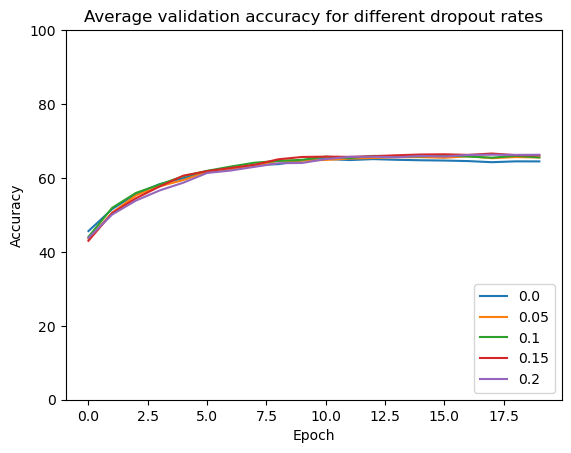

In [167]:
for x in range(dropout_rate_array.shape[0]):
    plt.plot(dropout_average_results[x], label = dropout_rate_array[x])

plt.title("Average validation accuracy for different dropout rates")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 100])
plt.legend(loc='lower right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

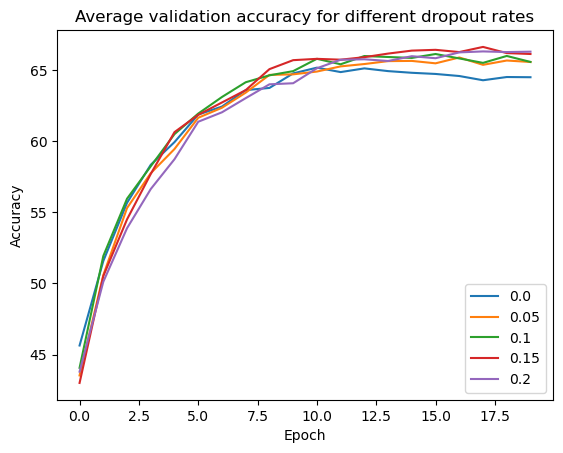

In [168]:
for x in range(dropout_rate_array.shape[0]):
    plt.plot(dropout_average_results[x], label = dropout_rate_array[x])

plt.title("Average validation accuracy for different dropout rates")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

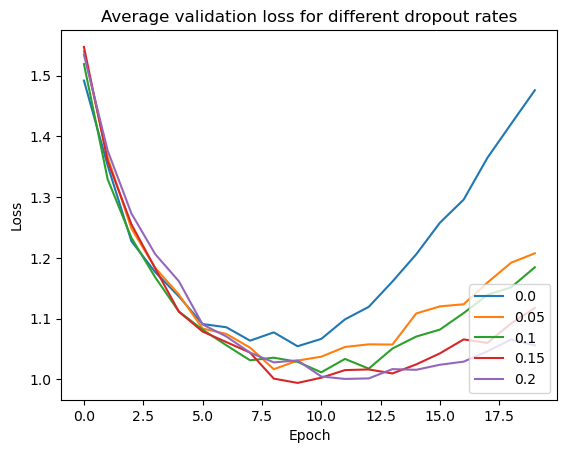

In [177]:
for x in range(dropout_rate_array.shape[0]):
    plt.plot(dropout_average_loss_results[x], label = dropout_rate_array[x])

plt.title("Average validation loss for different dropout rates")
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.0, 1.0])
plt.legend(loc='lower right')
plt.show

In [196]:
#freeze concolutional layers
#reinitialise dense layers
#retrain the dense layers with the different dropout rates

#print('default_conv_layers[0][0] = ', default_conv_layers[0][0])
#print('default_conv_layers[0][1] = ', default_conv_layers[0][1])

conv1 = layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))
conv2 = layers.Conv2D(64, (3, 3), activation='relu')
conv3 = layers.Conv2D(64, (3, 3), activation='relu')


transfer_dropout_rate_array = np.array([0, 0.2]) #Declaration of the dropout rates being tested
epochs_number, trial_number = 30, 5 #Declaration of the number of epochs and trials each learning rate will be trained over
transfer_trial_results, transfer_average_results = np.zeros((trial_number, epochs_number)), np.zeros((transfer_dropout_rate_array.shape[0], epochs_number)) #Declaration of arrays to hold the validation accuracy for each trial (same learning rate) and accross different learning rates
transfer_trial_loss_results, transfer_average_loss_results = np.zeros((trial_number, epochs_number)), np.zeros((transfer_dropout_rate_array.shape[0], epochs_number)) #Declaration of arrays to hold the validation accuracy for each trial (same learning rate) and accross different learning rates

for dropout_rate in range(transfer_dropout_rate_array.shape[0]):
    print("Dropout rate: ", transfer_dropout_rate_array[dropout_rate])
    for trial in range(trial_number): #For loop to ensure that "trial_number" trials are completed for each optimizer
        print("Trial number: ", trial) #Declaration of the trial number -> used to check progress
        keras.backend.clear_session()
        model = models.Sequential()
        # 3 Convolutional layers with 2 max pooling layers
        model.add(conv1)
        model.add(layers.MaxPooling2D((3, 3)))
        model.add(conv2)
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(conv3)
        model.add(layers.MaxPooling2D((2, 2)))
        #model.add(layers.Dense(256, activation='relu'))
        model.add(layers.Flatten())
        # 2 fully connected layers
        model.add(layers.Dense(32, activation='relu'))
        model.add(layers.Dropout(transfer_dropout_rate_array[dropout_rate]))
        model.add(layers.Dense(10, activation='softmax'))
        #model.summary()

        conv1.set_weights(default_conv_layers[0])
        conv2.set_weights(default_conv_layers[1])
        conv3.set_weights(default_conv_layers[2])
        conv1.trainable = False
        conv2.trainable = False
        conv3.trainable = False

        model.compile(optimizer=Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']) #A model is compiled using the structure above with the given optimizer
        history = model.fit(x=train_images_2, y=train_labels_2, validation_data=(train_images_1, train_labels_1), epochs=epochs_number) #The model is run for "epochs_number" epochs and saved to "history"
        transfer_trial_results[trial] = history.history['val_accuracy'] #The validation accuracy of the model is saved in the "trial_results" array
        transfer_trial_loss_results[trial] = history.history['val_loss'] #The validation accuracy of the model is saved in the "trial_results" array

    for epoch in range(epochs_number):
        transfer_average_results[dropout_rate, epoch] = 100*(np.sum(transfer_trial_results[:, epoch])/trial_number) #For every epoch across trials, the average validation accuracy after that epoch is recorded in "average_results"
        transfer_average_loss_results[dropout_rate, epoch] = np.sum(transfer_trial_loss_results[:, epoch])/trial_number #For every epoch across trials, the average validation accuracy after that epoch is recorded in "average_results"



Dropout rate:  0.0
Trial number:  0
Epoch 1/30
521/521 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4425 - loss: 1.6291 - val_accuracy: 0.7948 - val_loss: 0.6210
Epoch 2/30
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8191 - loss: 0.5532 - val_accuracy: 0.8412 - val_loss: 0.4681
Epoch 3/30
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8524 - loss: 0.4379 - val_accuracy: 0.8581 - val_loss: 0.4175
Epoch 4/30
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8629 - loss: 0.3972 - val_accuracy: 0.8639 - val_loss: 0.3993
Epoch 5/30
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8710 - loss: 0.3778 - val_accuracy: 0.8645 - val_loss: 0.3909
Epoch 6/30
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8712 - loss: 0.3700 - val_accuracy: 0.8677 - val_loss: 0.3839
Epoch 7/30
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8710 - loss: 0.3711 - val_accuracy: 0.8651 - val_loss: 0.3864
Epoch 8/30
521/521 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.87

<function matplotlib.pyplot.show(close=None, block=None)>

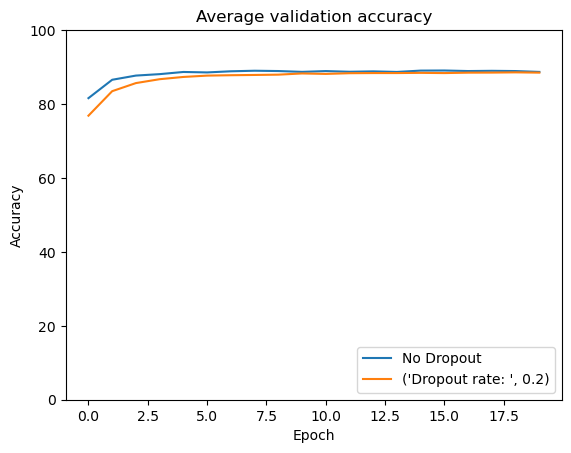

In [188]:
for dropout in range(transfer_dropout_rate_array.shape[0]):
    if transfer_dropout_rate_array[dropout] == 0:
            string = "No Dropout"
    else:
            string = "Dropout rate: ", transfer_dropout_rate_array[dropout]
    plt.plot(transfer_average_results[dropout], label = string)

plt.title("Average validation accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 100])
plt.legend(loc='lower right')
plt.show

[[79.59440708 83.97552013 85.4994905  86.09707713 86.42467141 86.63946748
  86.36467338 86.65146708 86.67306662 86.58666849 86.44867182 86.71746492
  86.65146708 86.46906972 86.5422678  86.60946846 86.58786893 86.60586715
  86.52666926 86.59986854 86.70546532 86.71626568 86.7906642  86.46427035
  86.53026938 86.79546475 86.71626568 86.60706878 86.65506601 86.80386305]
 [77.04086065 82.06515789 83.89032245 84.52150822 85.10829687 85.3518939
  85.3398931  85.72748661 85.82588315 85.98667979 85.93388081 85.89308381
  85.98068118 86.0106802  86.13187671 86.01308107 86.03947878 86.12467885
  85.91108203 86.30587339 86.15587711 86.09827757 86.21707439 86.24347448
  86.20627522 86.12467647 86.11507893 86.25307441 86.2146759  86.13667727]]


<function matplotlib.pyplot.show(close=None, block=None)>

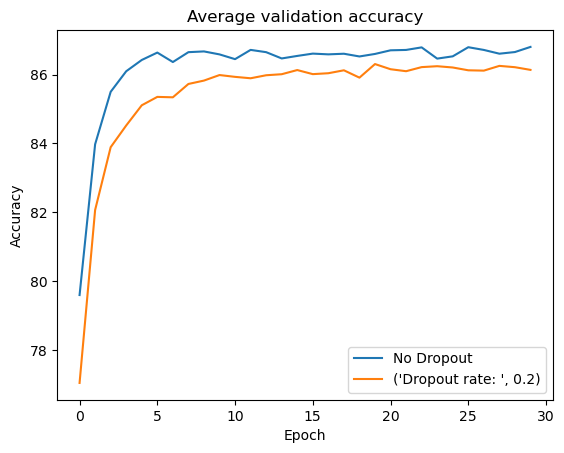

In [224]:
print(transfer_average_results)

for dropout in range(transfer_dropout_rate_array.shape[0]):
    if transfer_dropout_rate_array[dropout] == 0:
            string = "No Dropout"
    else:
            string = "Dropout rate: ", transfer_dropout_rate_array[dropout]
    plt.plot(transfer_average_results[dropout], label = string)

plt.title("Average validation accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show

[[0.61342376 0.46894906 0.42285337 0.40188788 0.39191197 0.38444118
  0.38887727 0.38144343 0.38225165 0.38213959 0.38484122 0.38047297
  0.38071809 0.38346049 0.38487326 0.38090586 0.38233562 0.38245759
  0.38310764 0.38113443 0.37838225 0.38171585 0.37902111 0.3856315
  0.38519541 0.37726078 0.37814612 0.38406491 0.38194371 0.37873755]
 [0.7073172  0.54607613 0.48667209 0.46091477 0.44397472 0.43089061
  0.42597252 0.41732615 0.41342312 0.40800748 0.40682051 0.40842335
  0.40554482 0.40421062 0.39951402 0.40411596 0.4003091  0.40030735
  0.40266008 0.39582409 0.39650777 0.3970365  0.39536544 0.39302686
  0.39543396 0.39499096 0.39596458 0.39396967 0.39462379 0.39540353]]


<function matplotlib.pyplot.show(close=None, block=None)>

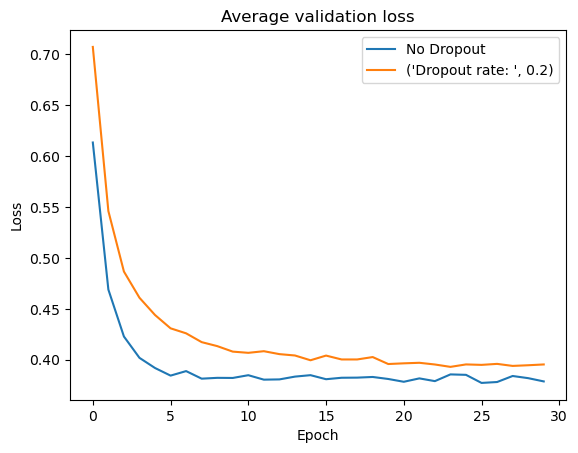

In [225]:
print(transfer_average_loss_results)

for dropout in range(transfer_dropout_rate_array.shape[0]):
    if transfer_dropout_rate_array[dropout] == 0:
            string = "No Dropout"
    else:
            string = "Dropout rate: ", transfer_dropout_rate_array[dropout]
    plt.plot(transfer_average_loss_results[dropout], label = string)

plt.title("Average validation loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show

### Experiment 3 (19 MARKS)
*Write up results for Experiment 3 here*





In [ ]:
#############################
### Code for Experiment 3 ###
#############################

# Conclusions and Discussion (instructions) - 25 MARKS
In this section, you are expected to:
* briefly summarise and describe the conclusions from your experiments (8 MARKS).
* discuss whether or not your results are expected, providing scientific reasons (8 MARKS).
* discuss two or more alternative/additional methods that may enhance your model, with scientific reasons (4 MARKS).
* Reference two or more relevant academic publications that support your discussion. (4 MARKS)






## Experiment 1

Using a scheduler to vary the learning rate improves performance of a network. This was expected as it allows a network to reach a high accuracy earlier during training while avoiding any local minima.

After the model approached the global minimum and a high accuracy is found, the learning rate can be reduced increasing the networks accuracy while avoiding "bouncing" out of the found minima.
It was found that most learning rates converged on a maximum accuracy after 10 epochs, after which, the networks started to overfit.

It was expected for the scheduler to improve accuracy and decrease performance of the model, however, it was not expected for the scheduler to end the training period with a greater loss.


---
## Experiment 2

The data gathered during this experiment suggests that using dropout is good for training a network over many epochs as it reduced the rate of overfitting, however, when transfer learning, it is better to not use dropout. While it was expected that the networks with a high dropout rate would be resistant to overfitting, networks not using dropout had a higher average accuracy and lower loss during transfer learning was not. As expected, the dropout-less networks had a steeper accuracy curve (as more neurons could be taken into account when training for any given epoch) but networks with dropout had a higher accuracy and lower loss.

At every epoch where the accuracy drastically decreased, the loss increased, creating a mirror of accuracy curves. The average accuracy of the 0 dropout networks becomes unstable when the loss becomes unstable. There are more differences in the loss the longer the networks were trained as some overfitting was introduced; the 0.2 dropout curve, however, plateaus after the 23rd epoch as it takes longer for any overfitting to take effect.

It was expected that the 0.2 dropout accuracy curve would be smoother and higher than the 0 dropout curve. This is because the dropout rate means that weights are effected less often (smoothing the curve) and because the accuracy after 20 epochs was greater in figure 5, it was expected that the 0.2 dropout average accuracy would be greater than the 0 dropout accuracy after 30 epochs, especially given that after 12 epochs, the accuracy of the 0 dropout rate networks started to decrease (figure 6).


---
## Additional Methods

One method that could be used to improve the accuracy of the network would be to pad the images as part of preprocessing. This would help the locational information be preserved for longer through the networks. This, however, may work best on larger networks. Similarly, tests should be done with various convolutional filter sizes to see how these affect the accuracy and time taken to train as different filter sizes would change the amount of location-based information the network has.

# References (instructions)
Use the cell below to add your references. A good format to use for references is like this:

[AB Name], [CD Name], [EF Name] ([year]), [Article title], [Journal/Conference Name] [volume], [page numbers] or [article number] or [doi]

Some examples:

JEM Bennett, A Phillipides, T Nowotny (2021), Learning with reinforcement prediction errors in a model of the Drosophila mushroom body, Nat. Comms 12:2569, doi: 10.1038/s41467-021-22592-4

SO Kaba, AK Mondal, Y Zhang, Y Bengio, S Ravanbakhsh (2023), Proc. 40th Int. Conf. Machine Learning, 15546-15566

*List your references here*
https://keras.io/

Diederik P., Kingma, Jimmy Ba (2015), Adam: A Method for Stochastic Optimization, ICLR 2015

https://arxiv.org/abs/1412.6980